In [5]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))


Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Department of Physics, Paris, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Temporal and topological partitioning in real-world growing networks for scale-free properties study*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Temporal and topological partitioning in real-world growing networks for scale-free properties study* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived $O-(RV/RL)-O$ Graph Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ Partitioning](./SM11_TSLPartitioning.ipynb)
- 12. [Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)


**NB :** As of 2025/05/16, the QuickStart guide, the replication packages, and SM01 to SM12 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. The graphs used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges). 

In [6]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   
DisplayCopyrightInfo()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



# **Replication Package (Figures)**

This notebook generates and saves the figures presented in the latest verion of the article reporting the study results, available on [arXiv](https://arxiv.org/abs/2501.10145)

## Figure #1 : SWH Dataset

This figure was created using PowerPoint.  
The PowerPoint source file is available [here (PPT)](./ImportData/graph_dataset_bowtie_20250516.pptx).  
The image file is available [here (PNG)](./ImportData/SWH_dataset.png).

![Figure 1](./ImportData/SWH_dataset.png)

**Caption** : Graph representation of the SWH network, where $nodes$ represent software versions ($releases$/$revisions$) and artifacts produced by projects across various $origins$/$forges$.  Developers can act as $authors$ and/or $committers$ within these projects.  Release and revision nodes include native temporal attributes linked to committer or author dates. Edge directions follows multilayer rules, and may depend on nodes' intrinsic identifiers.

## Figure #2 : New nodes and new edges over time

This figure was created using a python script.  

![Figure 2](./ImportData/Nodes_Edges_1970_2030.png)

**Caption** : New nodes (TOP) and edges (BOTTOM) per month by type ($RV$: revision, $RL$: release) from 1970 to 2030 in the SWH dataset (exported March 2021, dashed line). Exponential growth is noted, except for $RL$ nodes, and associated edges, with a constant rate since early 2014 (third dotted line). Existence of $RL>RL$ edges align with the adoption of $git$ and the launch of $github.com$ in 2008 (first dotted line). Plain vertical lines indicate January 1st of each year from 2017 to 2021. Anomalies at the end of 2017 and 15 months before export, suggest bias due to SWH crawling policies. Post-export nodes highlight temporal data issues (see Supplemental Material).


In [12]:
# python script
# ! image is saved in exportpath

Rebuild=False
Fsave=True
if Rebuild:
    stat=pickle.load(open(exportpath+"stat_nodes_edges_1970_2030_20240517.pkl","rb"))

    nfig=2
    fontsize=32

    def verticalline(fig,axs):
            alpha=0.5
            lw=3
            for year in range(2017,2022):
                axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
            axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
            for year in [2008,2011,2014]:
                axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)

    def shiftlabels(fig,axs):
            xticklabels=axs.get_xticklabels()
            for i, label in enumerate(xticklabels):
                if i == 0:  
                    label.set_horizontalalignment('left')
                elif i == len(xticklabels) - 1:  
                    label.set_horizontalalignment('right')
                else:  
                    label.set_horizontalalignment('center')

    x=1970+np.arange(1634)/12

    fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   
    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1970,2025)
        axs[i].grid()

    for sourcetype in ["RV","RL"]:
        if ">" not in sourcetype and np.sum(stat[sourcetype])!=0 and sourcetype!="O":
            axs[0].scatter(x,stat[sourcetype],s=30,zorder=10,label=sourcetype+" nodes")
    axs[0].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[0].set_yscale("log") 
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize)
    verticalline(fig,axs[0])
    shiftlabels(fig,axs[0])

    for sourcetype in ["RV>RV","RL>RV","RL>RL"]:
        if ">" in sourcetype and np.sum(stat[sourcetype])!=0:
            axs[1].scatter(x,stat[sourcetype],s=30,zorder=10,label=sourcetype+" edges")
    axs[1].legend(loc='upper left',fontsize=fontsize,ncol=2,markerscale=3)
    axs[1].set_yscale("log") 
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[1])
    shiftlabels(fig,axs[1])

    if Fsave:
        plt.savefig(exportpath+'Nodes_Edges_1970_2030.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()

## Figure #3 : Topological Partioning ($RV>RV$)

This figure was created using a python script.  

![Figure 3](./ImportData/RatioRVRV_1970_2030.png)

**Caption** :(TOP) Number of new $RV$ nodes and $RV>RV$ edges per month, distinguishing nodes with outgoing edges $\delta_{out}>0$ and without $\delta_{out}=0$. (BOTTOM) Rate comparison of new edges per (all) new $RV$ node (orange) and restricting to nodes with $\delta_{out}>0$ (blue).
This partitioning reveals an exponential growth from the mid 2000s to 2013, followed by a constant rate from 2014, which aligns with the rate of new $RL>RV$ edges (Fig. 2, orange) but not $RV>RV$ edges (Fig. 2, blue). The post-2014 decrease in $RV>RV/RV$ rate reflects faster growth in $RV$ nodes without outgoing edges ($\delta_{out}=0$) compared to those with at least one outgoing edge.

In [15]:
# python script 
# ! image is saved in exportpath

Rebuild=False
Fsave=True

if Rebuild:
    outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))

    def verticalline(fig,axs):
            alpha=0.5
            lw=3
            for year in range(2017,2022):
                axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
            axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
            for year in [2008,2011,2014]:
                axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)

    def shiftlabels(fig,axs):
            xticklabels=axs.get_xticklabels()
            for i, label in enumerate(xticklabels):
                if i == 0:  
                    label.set_horizontalalignment('left')
                elif i == len(xticklabels) - 1:  
                    label.set_horizontalalignment('right')
                else:  
                    label.set_horizontalalignment('center')    

    RV_0=outdegree_RV_RV_month["nodes_dout==0"]
    RV_1plus=outdegree_RV_RV_month["nodes_dout>=1"]
    RV_RV=outdegree_RV_RV_month["edges_dout>=0"]

    datearray=1970+np.arange(1634)/12 # month since epoch to year+mont/12 (month in [0,11])

    nfig=2
    fontsize=32

    fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   

    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1970,2025)
        axs[i].grid()


    axs[0].scatter(datearray,RV_1plus,s=30,zorder=10,label=r'RV($\delta_{out}>0$) nodes')
    axs[0].scatter(datearray,RV_0,s=30,zorder=10,label=r'RV($\delta_{out}=0$) nodes')
    axs[0].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize)
    axs[0].set_yscale("log") 
    verticalline(fig,axs[0])
    shiftlabels(fig,axs[0])

    axs[1].scatter(datearray,RV_RV/(RV_1plus),s=30,zorder=10,label=r'RV>RV / RV($\delta_{out}>0$) nodes')
    axs[1].scatter(datearray,RV_RV/(RV_0+RV_1plus),s=30,zorder=10,label="RV>RV / RV nodes")
    axs[1].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
    axs[1].set_ylim(0.975,1.125)
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[1])
    shiftlabels(fig,axs[1])

    if Fsave:
        plt.savefig(exportpath+'RatioRVRV_1970_2030.png', format='png', dpi=300,bbox_inches='tight')

    plt.show()

## Figure #4 : IN/OUT Degree distribution over time

This figure was created using a python script.  

![Figure 4](./ImportData/Merge_InOutDegree_OO_RVRV_top.png)

**Caption** : Complementary cumulative distribution function (CCDF) of outgoing degrees (LEFT) and incoming degrees (RIGHT) over time for $RV$ nodes (limited to $RV > RV$ edges) and $O$ nodes of the $O - (RV/RL) - O$ graph. Distributions for January 1st of 2008, 2014, and 2019 are shown in different colors.

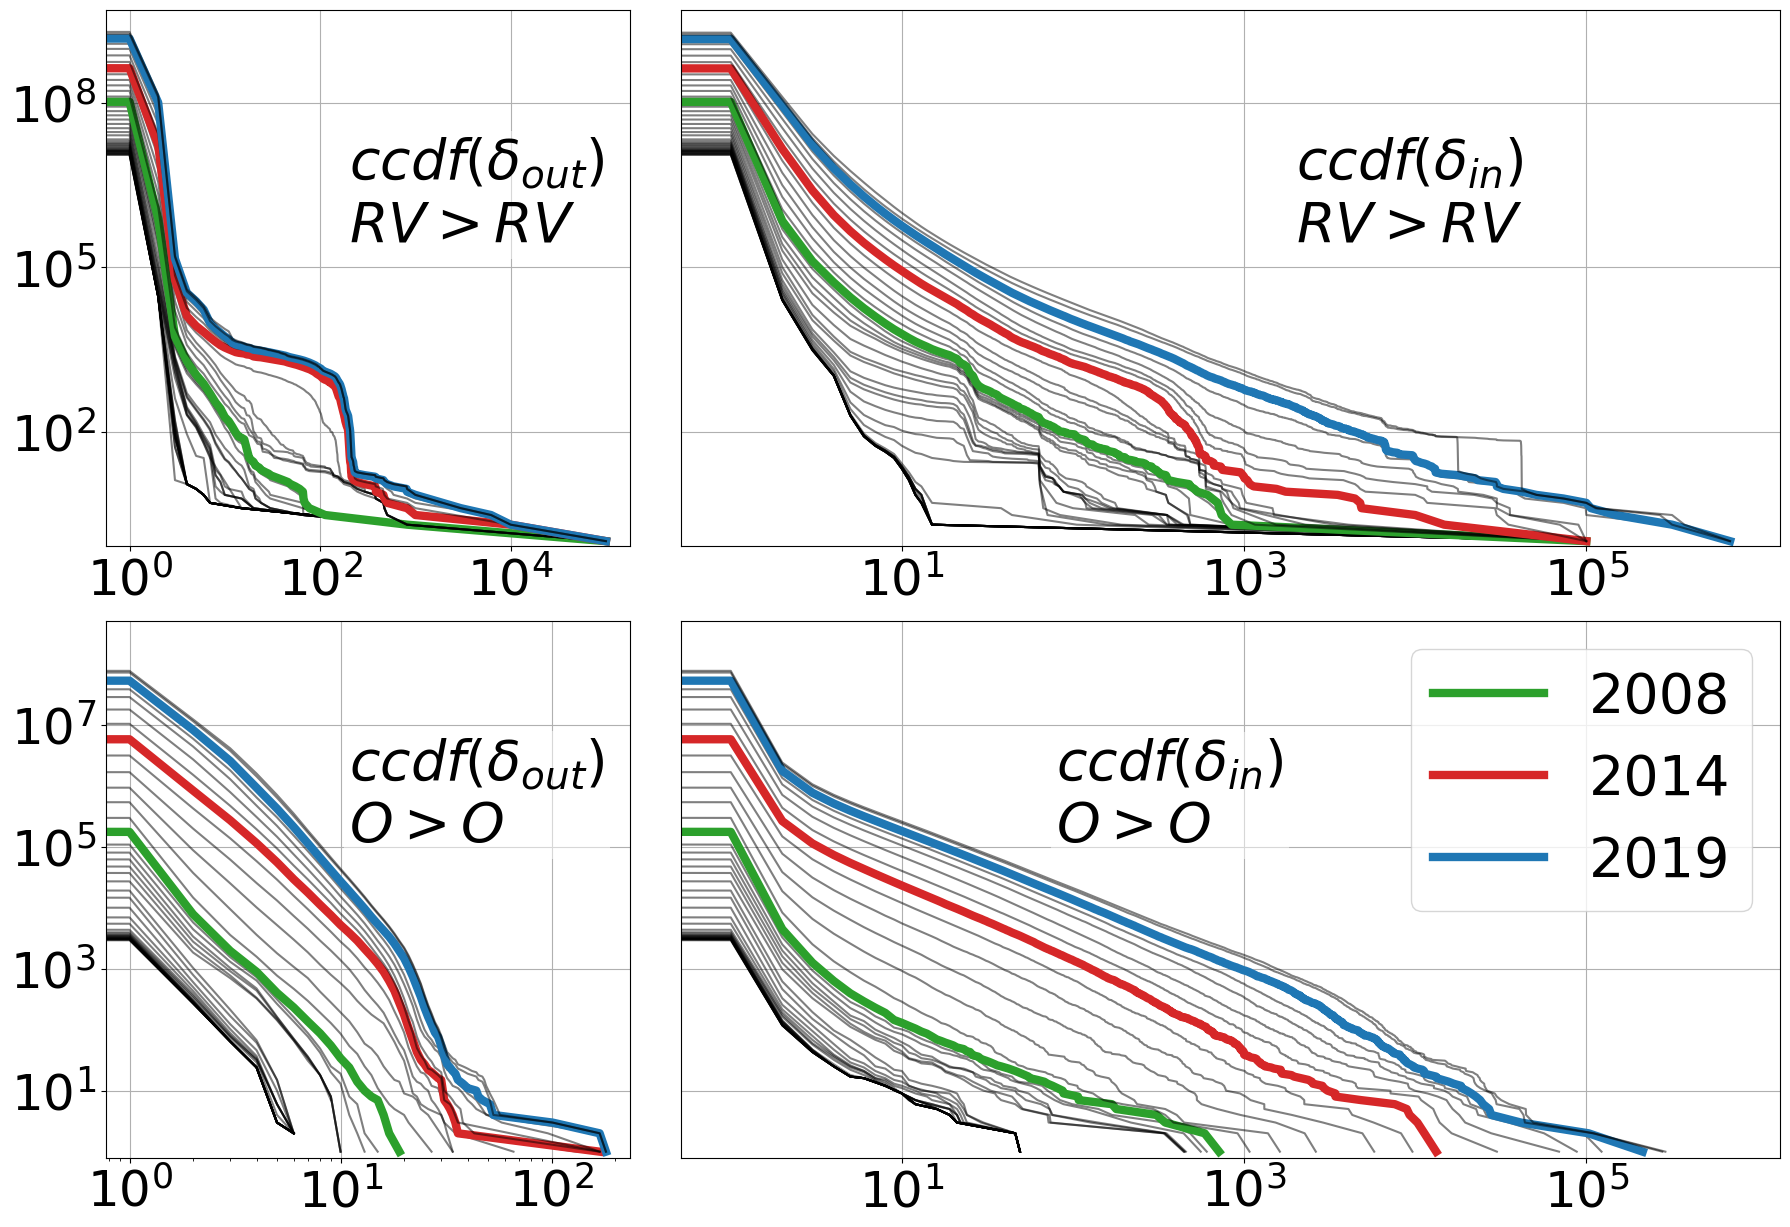

In [24]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:
    
    nfig=4
    fontsize=40


    fig = plt.figure(figsize=(18, 6*nfig))  # Taille de la figure

    ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=1,sharey=None,sharex=None)  # 1er sous-graphique, 1/3 de la largeur
    ax3 = plt.subplot2grid((4, 3), (1, 0), colspan=1,sharey=None,sharex=None)  # 3e sous-graphique, 1/3 de la largeur
    ax4 = plt.subplot2grid((4, 3), (1, 1), colspan=2,sharey=ax3,sharex=None)  # 4e sous-graphique, 2/3 de la largeur
    ax2 = plt.subplot2grid((4, 3), (0, 1), colspan=2,sharey=ax1,sharex=ax4)  # 2e sous-graphique, 2/3 de la largeur

    ax1.tick_params(bottom=True, labelbottom=True,labelsize=FontSize[3])
    ax2.tick_params(left=False, labelleft=False,bottom=True, labelbottom=True,labelsize=FontSize[3])
    ax3.tick_params(labelsize=FontSize[3])
    ax4.tick_params(left=False, labelleft=False,labelsize=FontSize[3])

    for axtmp in [ax1,ax2,ax3,ax4]:
        axtmp.grid()
        axtmp.set_yscale("log")
        axtmp.set_xscale("log")

    ax1.set_xticks([1e0,1e2,1e4])    
    ax3.set_xticks([1e0,1e1,1e2])    
    ax4.set_xticks([1e1,1e3,1e5])    

    ax1.text(2e2,3e5,r'$ccdf(\delta_{out})$'+'\n'+r'$RV>RV$',fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    ax2.text(2e3,3e5,r'$ccdf(\delta_{in})$'+'\n'+r'$RV>RV$',fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    ax3.text(1.1e1,1.2e5,r'$ccdf(\delta_{out})$'+'\n'+r'$O>O$',fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    ax4.text(8e1,1.2e5,r'$ccdf(\delta_{in})$'+'\n'+r'$O>O$',fontsize=fontsize,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))


    ax1.set_ylim(0.8,5e9)
    ax3.set_ylim(0.8,5e8)
    
    #first line
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","rb"))
    field,key=('ccdf',"ccdf")
    YearList=[2008,2014,2019]
    ColorList=["tab:green","tab:red","tab:blue"]
    s="RV>RV"
    for year in dout[s].keys():
        if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax1.plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c=c,lw=3*2,label=str(year))
                ax2.plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c=c,lw=3*2,label=str(year))
        elif year<2022:
                ax1.plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c="k",alpha=0.5)
                ax2.plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c="k",alpha=0.5)

    # second line

    filename=exportpath+"degreeInOutHisto_TT_O-O_BigO_year_1980_2025_20241008.pkl"
    dout,din=pickle.load(open(filename,"rb"))
    field,key=('ccdf',"ccdf")
    YearList=[2008,2014,2019]
    ColorList=["tab:green","tab:red","tab:blue"]
    s="O>O"
    for year in dout[s].keys():
        if year in YearList:
                c=ColorList[np.where(np.array(YearList)==year)[0][0]]
                ax3.plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c=c,lw=3*2,label=str(year))
                ax4.plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c=c,lw=3*2,label=str(year))
        elif year<2022:
                ax3.plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c="k",alpha=0.5)
                ax4.plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c="k",alpha=0.5)
    ax4.legend(loc='upper right',fontsize=fontsize,ncol=1,markerscale=3)

    plt.tight_layout()

    if Fsave:
        plt.savefig(exportpath+'Merge_InOutDegree_OO_RVRV_top.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()


## Figure #5 : 

This figure was created using a python script.  

![Figure 5](./ImportData/Merge_InOutDegree_OO_RVRV_bottom.png)

**Caption** : (TOP) The ratio of new edges to new nodes over time for for the graphs of Fig. 4 indicates regime changes in 2008, around 2011, and from 2014 onward. $O-(RV/RL)-O$ derived network distributions are more regular and less influenced by outliers, improving the estimate of the power law exponent $\hat{e}(\delta_{in})$ (BOTTOM) according to steps 1 and 2 proposed by Clauset et al.~\cite{clauset_power-law_2009}, which assumes a distribution *tail* belonging to the parametric family $DF(\delta) \propto \delta^{-e}$.


./ExportData/stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl


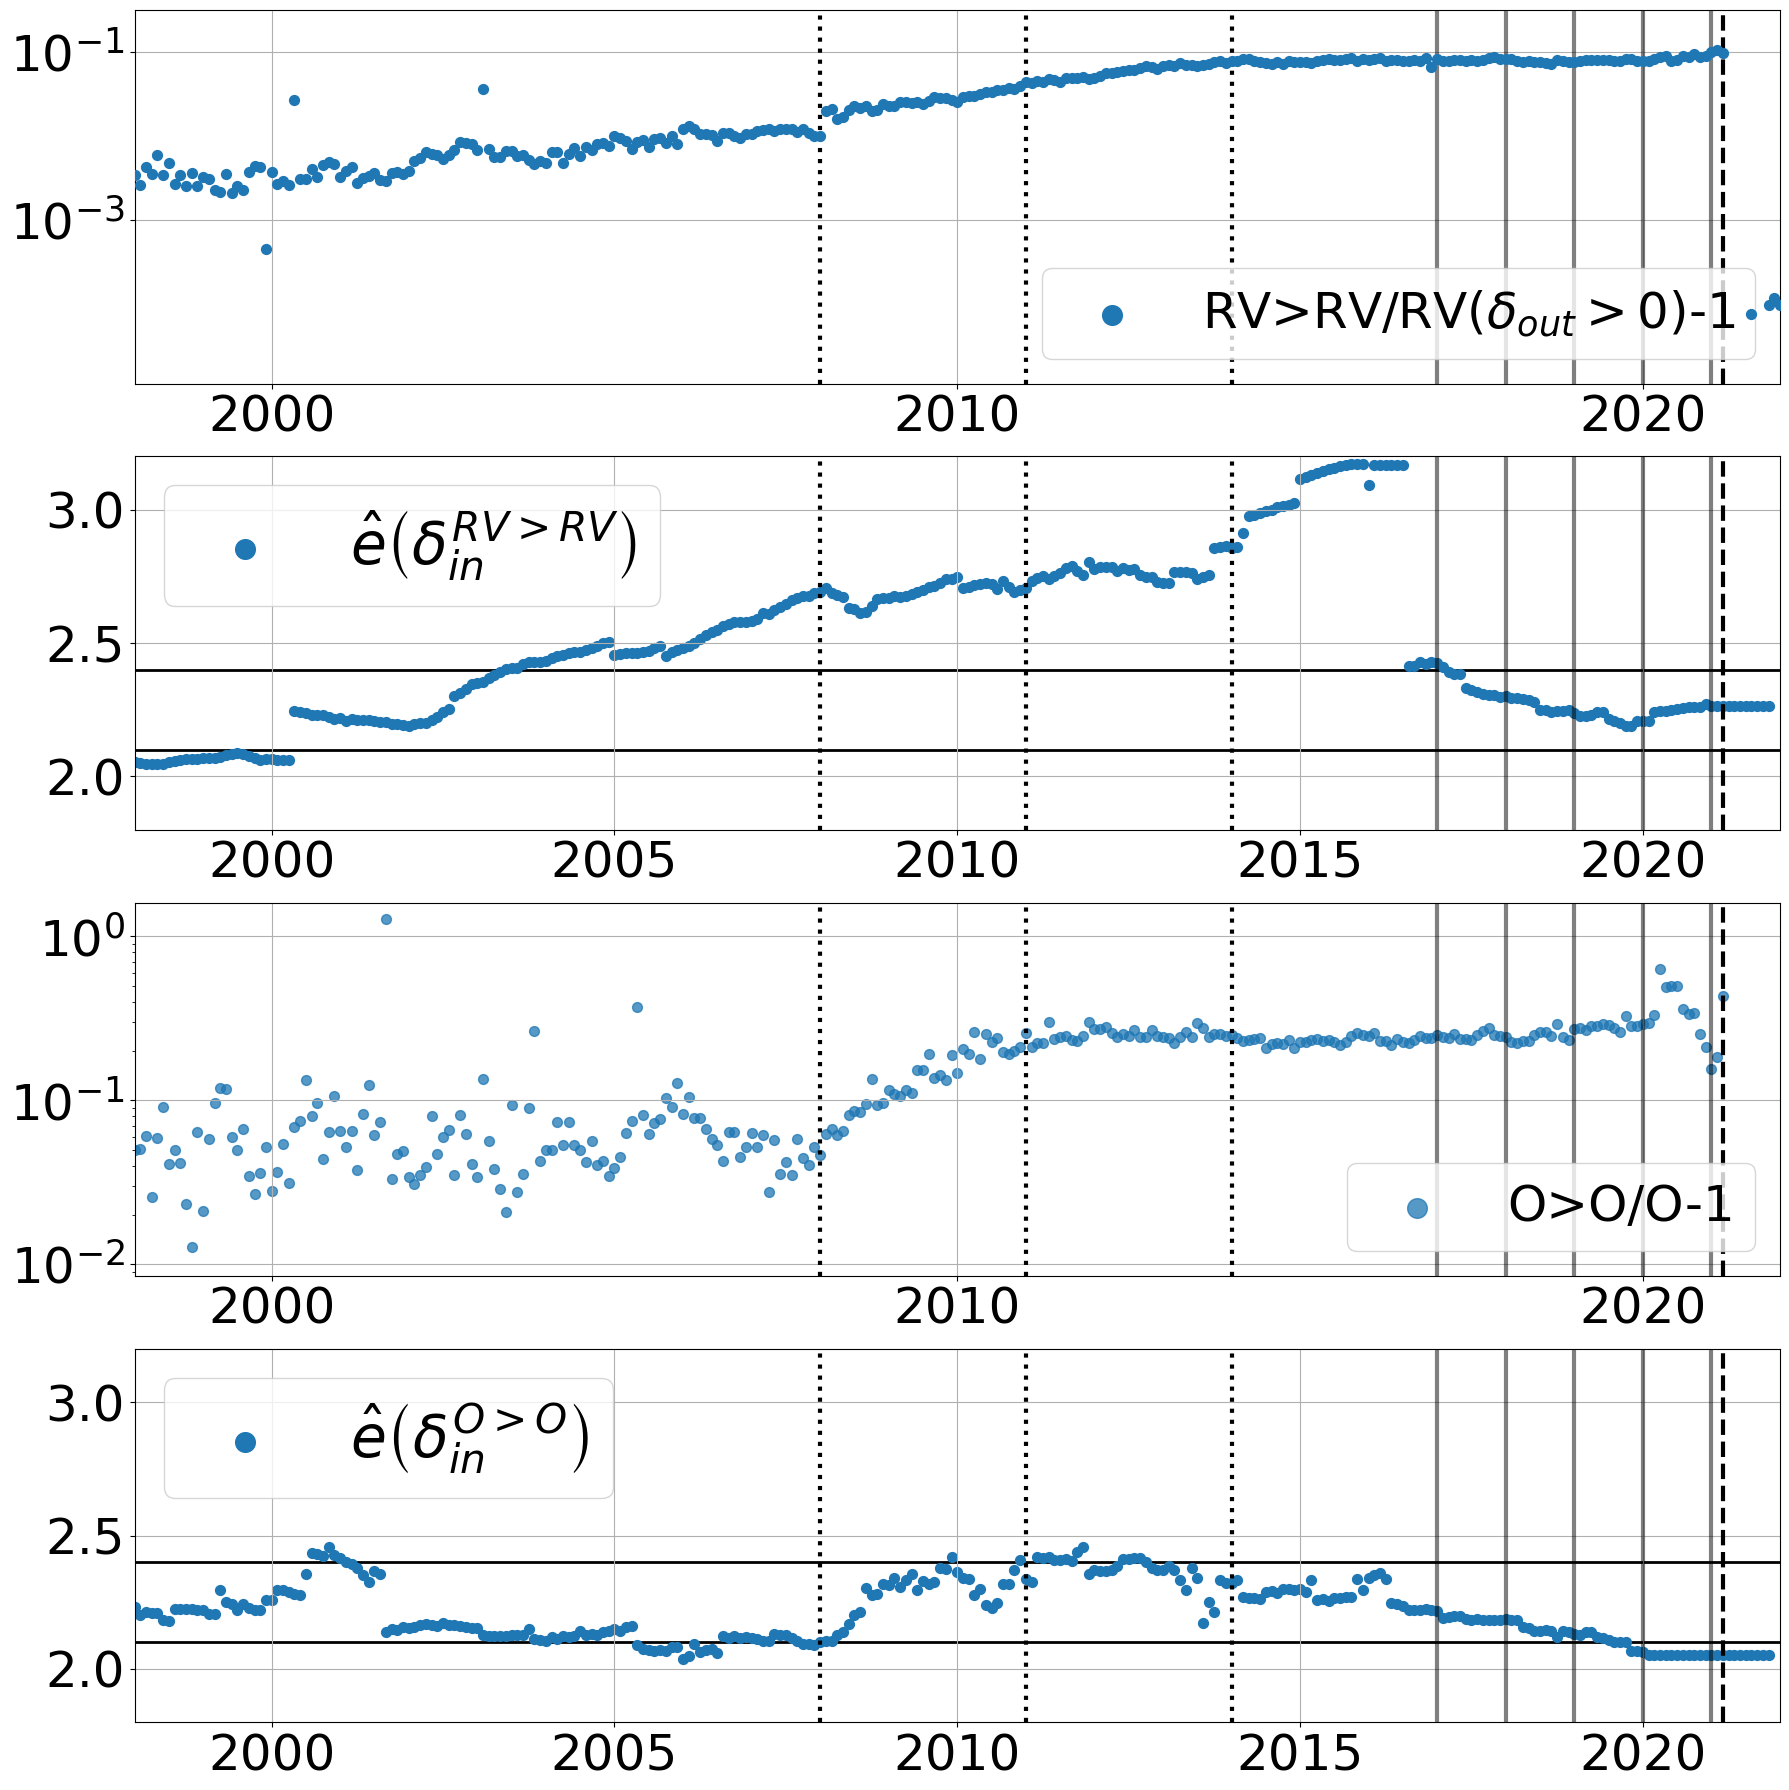

In [28]:
# python script 
# ! image is saved in exportpath

Rebuild=True
Fsave=True

if Rebuild:
    
    nfig=3
    fontsize=36

    fig = plt.figure(figsize=(18, 6*nfig))  # Taille de la figure

    ax3 = plt.subplot2grid((4, 3), (0, 0), colspan=3)
    ax4 = plt.subplot2grid((4, 3), (1, 0), colspan=3)
    ax5 = plt.subplot2grid((4, 3), (2, 0), colspan=3)
    ax6 = plt.subplot2grid((4, 3), (3, 0), colspan=3)

    ax3.set_xticks([1980,1990,2000,2010,2020])    
    ax4.set_xticks([2000,2005,2010,2015,2020])    
    ax5.set_xticks([1980,1990,2000,2010,2020])    
    ax6.set_xticks([2000,2005,2010,2015,2020])    

    # First line
    filename=exportpath+"stat_nodes_edges_O-O_BigO_ORI_1970_2030_20241008.pkl"
    print(filename)
    stat=pickle.load(open(filename,"rb"))
    
    # displaying all curves
    x=np.arange(1634)/12+1970
    def VerticalLinesLocal(axtmp):
        lw=3;alpha=0.5

        for year in [2017,2018,2019,2020,2021]:
            axtmp.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axtmp.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            axtmp.axvline(x=year,color='k',linestyle=':',alpha=1,lw=lw)

    for key,value in stat.items():
        if np.sum(value[1:-1])!=0 and ">" in key:
            length=(len(key)-1)//2
            ax5.scatter(x,value/stat[key[-length:]]-1,s=50,label=key+"/"+key[-length:]+"-1",alpha=0.75)
            
    ax5.legend(loc='lower right',fontsize=fontsize,ncol=1,markerscale=2)
    ax5.set_yscale("log") 
    ax5.set_xlim(1998,2022)
    ax5.tick_params(axis='both',which='both',labelsize=fontsize)
    ax5.grid()

    outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))
    datearray=1970+np.arange(1634)/12 
    #RV_0=outdegree_RV_RV_month["nodes_dout==0"]
    RV_1plus=outdegree_RV_RV_month["nodes_dout>=1"]
    RV_RV=outdegree_RV_RV_month["edges_dout>=0"]    
    ax3.scatter(x,(RV_RV-RV_1plus)/(RV_1plus),s=50,zorder=10,label=r'RV>RV/RV($\delta_{out}>0$)-1')
    ax3.legend(loc='lower right',fontsize=fontsize,ncol=1,markerscale=2)
    ax3.set_yscale("log")
    ax3.set_xlim(1998,2022)
    ax3.tick_params(axis='both',which='both',labelsize=fontsize)
    ax3.grid()

    VerticalLinesLocal(ax5)
    VerticalLinesLocal(ax3)
    
    # fourth line

    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_O-O_BigO_Month_1980_2025_20241008.weightedKS_6_SL_True.ehat.pkl","rb"))
    ax6.scatter(xdate,e_x_min,s=50,label=r'$\hat{e}\left(\delta_{in}^{O>O}\right)$')
    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_20240924.weightedKS_6.ehat.pkl","rb"))
    ax4.scatter(xdate,e_x_min,s=50,label=r'$\hat{e}\left(\delta_{in}^{RV>RV}\right)$')

    ax6.set_ylim(1.8,3.2)
    ax6.set_xlim(1998,2022)
    ax6.tick_params(axis='both',which='both',labelsize=fontsize)
    ax6.legend(loc='upper left',fontsize=fontsize+6,ncol=1,markerscale=2)
    ax6.grid()
    VerticalLinesLocal(ax6)
    ax6.axhline(y=2.4,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)
    ax6.axhline(y=2.1,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)

    ax4.set_ylim(1.8,3.2)
    ax4.set_xlim(1998,2022)
    ax4.tick_params(axis='both',which='both',labelsize=fontsize)
    ax4.legend(loc='upper left',fontsize=fontsize+6,ncol=1,markerscale=2)
    ax4.grid()
    VerticalLinesLocal(ax4)
    ax4.axhline(y=2.4,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)
    ax4.axhline(y=2.1,color='k',linestyle='-',alpha=1,lw=2,zorder=-10)

    plt.tight_layout()

    if Fsave:
        plt.savefig(exportpath+'Merge_InOutDegree_OO_RVRV_bottom.png', format='png', dpi=300,bbox_inches='tight')
    plt.show()


## Figure #6 : Bow-Tie representation

This figure was created using PowerPoint.  
The PowerPoint source file is available [here (PPT)](./ImportData/graph_dataset_bowtie_20250516.pptx).  
The image file is available [here (PNG)](./ImportData/bowtie.png).

![Figure 6](./ImportData/bowtie.png)

**Caption** : Bow-tie-like structure representation of the $O-(RV/RL)-O$ derived growing network. Edge weights take self-loops into account.